## predicting wheather person has diabities or not and creating custom knn function 

In [17]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler


In [18]:
df=pd.read_csv(r'C:\Users\raosa\Desktop\eda\files\diabetes.csv')

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
val=df.columns
val

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
val=val[[1,2,3,4]]
val
val[1]

'BloodPressure'

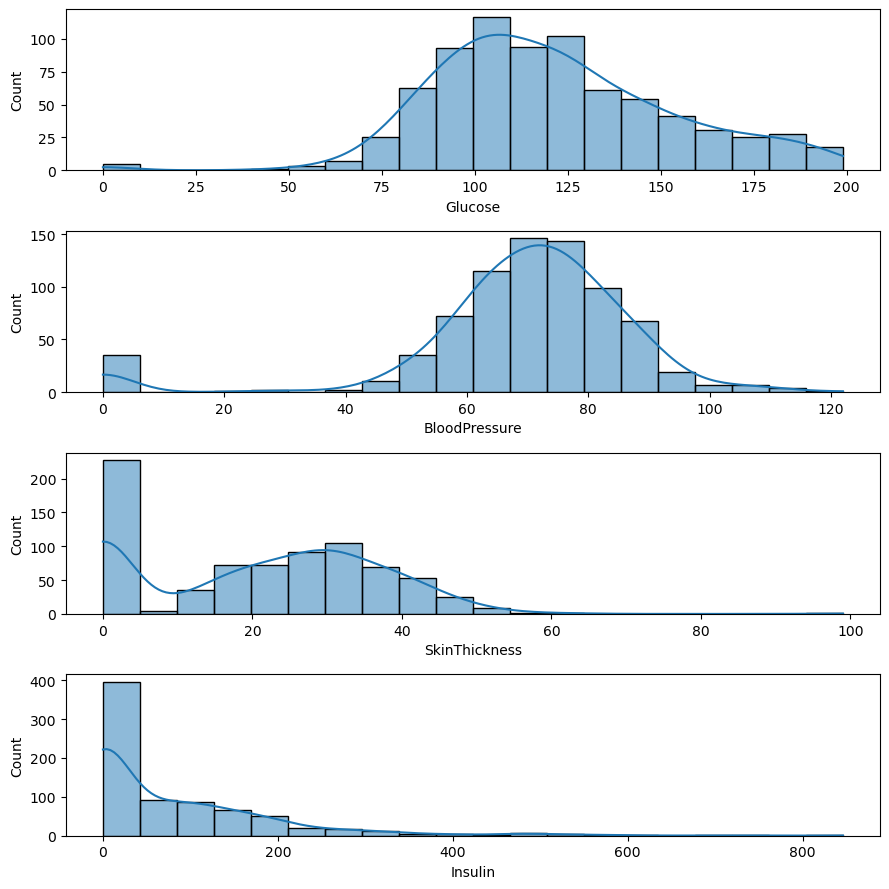

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9),tight_layout=True)
for i,j in enumerate(val):
    plt.subplot(4,1,i+1)
    sns.histplot(df[val[i]],bins=20,kde=True)
    plt.xlabel(val[i])
#apart from insulin and glucose( little bit left) which is left skewed all the other mesaurement are normally distributed 
#since its skewed its better to take median instead of the mean 

In [23]:
for i in val:  #removing zeroes as in this particular values 0 cant be there
    df[i]=df[i].replace(0,np.nan)
    mean=int(df[i].median(skipna=True))
    df[i]=df[i].replace(np.nan,mean)

In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [25]:
df.columns[8]

'Outcome'

In [26]:
X=df.iloc[:,:7] #excluding outcome column 
y=df.iloc[:,8]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.23)

In [28]:

print(len(X_train),len(X_test))

591 177


In [29]:
import math

val=math.sqrt(len(y_test))
val  #this is the no of k neighbours 
print(int(val))
val=math.floor(val)
print(val)

13
13


In [30]:
#model training 
knn=KNeighborsClassifier()

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
print(knn.feature_names_in_)
print(knn.effective_metric_)
print(knn.effective_metric_params_)
print(knn.n_features_in_)


['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction']
euclidean
{}
7


In [33]:
y_pred=knn.predict(X_test)
score=knn.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [34]:
score

0.751412429378531

In [35]:
#after preprocessing the data 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
#model training 
knn=KNeighborsClassifier(n_neighbors=val,p=2)

knn.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=13)

In [37]:
y_pred=knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
score=knn.score(X_test,y_test) #difference cause of kneighbours defining also default is 5
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8135593220338984

In [39]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[111,  11],
       [ 22,  33]], dtype=int64)

Text(0.5, 1.0, 'accuracy: 0.8135593220338984')

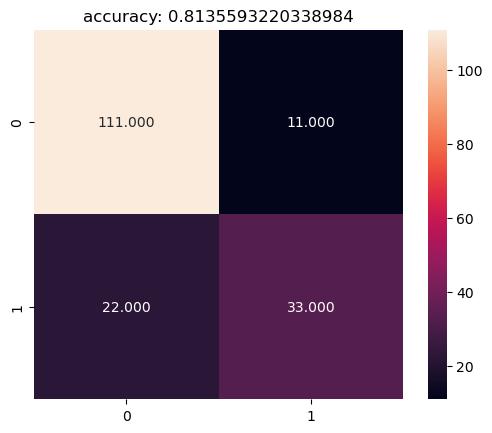

In [40]:
sns.heatmap(cm,annot=True,square=True,fmt='.3f')
plt.title('accuracy: {}'.format(score))

In [41]:
print(f1_score(y_test,y_pred))
ac=(accuracy_score(y_test,y_pred))
rc=(recall_score(y_test,y_pred))
pc=(precision_score(y_test,y_pred))
print(ac)

0.6666666666666665
0.8135593220338984


In [42]:
print(pc) #precision score  
print(rc) #recall score
val=(2*pc*rc)/(pc+rc)
val #this is the f1_score 

0.75
0.6


0.6666666666666665

## creating custom knn 

In [63]:
from sklearn.datasets import make_blobs


In [64]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 45)
print(len(y))

500


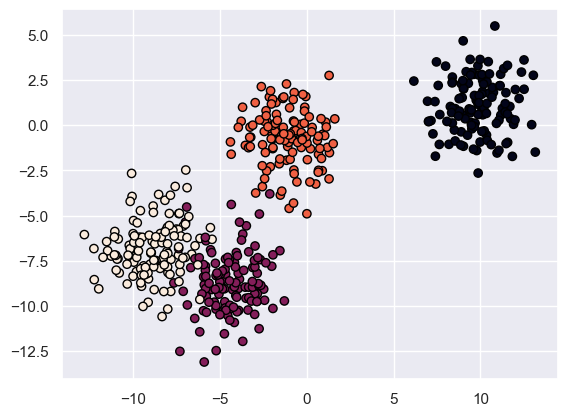

In [65]:
sns.set()
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='black')

In [66]:
print(X[:4]) #x and y coordinates 
print(y[:4]) #values 


[[-8.99761946 -7.68725826]
 [ 8.3836907   2.65737363]
 [-9.54923988 -6.22458151]
 [11.69188558  1.03199847]]
[3 0 3 0]


In [67]:
from scipy.spatial import distance
val=X[1]
print(distance.euclidean(val,X[2]))
print(distance.euclidean(X[1],X[3]))

20.01197457330024
3.6859188461326995


In [78]:
from scipy.spatial.distance import euclidean as ed
def knn(X,y,idx,no):
    label=[]
    
    val=l
    for i,j in enumerate(X):
        label.append((i,ed(val,j)))
    sort_ans=label
    sort_ans.sort(key=lambda x:x[1]) # sorted by euclidean distance 
    near=[]
    for i in range(no):
        near.append(sort_ans[i]) # all the near elements that are considered 
        
    return near       
    # we get the distances and indexes 

        
no=int(math.sqrt(len(X)))
if(no%2==0):
    no+=1
rand=np.empty((1,2))
rand[0,0]=np.random.choice(X[:,0])
rand[0,1]=np.random.choice(X[:,1])
l=[]
l.append(rand[0,0])
l.append(rand[0,1])
print(no)
idx=3
ans=knn(X,y,l,(no))
val=np.array(ans)
ans
        

        
        


23


[(204, 1.0093293941772685),
 (30, 1.7243919448470106),
 (76, 1.817339550035883),
 (324, 1.824803534057042),
 (444, 1.9702718469918588),
 (433, 2.0058186740064192),
 (263, 2.2361312855061577),
 (301, 2.27596553291417),
 (210, 2.305513599897816),
 (477, 2.3382357092302706),
 (126, 2.374194791769732),
 (496, 2.3832486839543376),
 (488, 2.406076825072017),
 (492, 2.413230598481122),
 (425, 2.4235875825425905),
 (85, 2.4265446834801385),
 (452, 2.449162518098713),
 (127, 2.539843593025257),
 (68, 2.5616339675455784),
 (169, 2.5853855756734307),
 (463, 2.6307322238111315),
 (160, 2.6393196581227203),
 (252, 2.6948483836054167)]

In [79]:
keys=[]
for i in range(len(ans)):
    keys.append(ans[i][0])

print(y[keys])
mode=np.bincount(y[keys]).argmax()
print('according to knn answer will be ',mode)    

[1 3 1 3 3 1 3 2 1 3 3 3 3 1 1 2 3 3 3 1 3 1 1]
according to knn answer will be  3


23


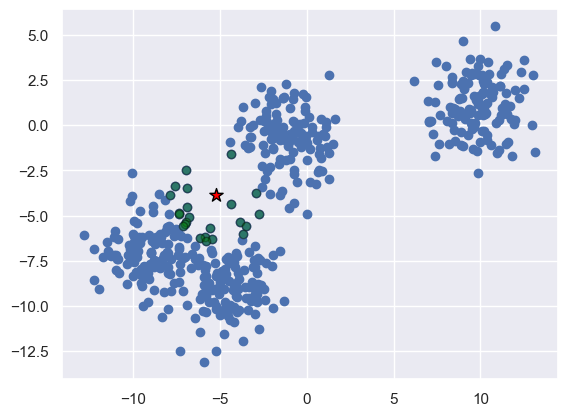

In [80]:
XX=X[keys]
YY=y[keys]
print(len(XX))
plt.scatter(X[:,0],X[:,1])
plt.scatter(XX[:,0],XX[:,1],c='green',alpha=0.4,edgecolors='black')
plt.scatter(l[0],l[1],marker='*',color='red',s=100,edgecolors='black')

## rough work 

In [ ]:
a = [[0, 0, 0], [1, 1, 1]]
b = [[1, 0, 0], [1, 1, 0]]
print(type(a))
print(np.array(a).ndim)

In [ ]:
val=X[[3]]
print(type(val))
print(val)
x=[]
for i in range(len(X)):
    x.append(X[[i]])
print(X.ndim)
print(X[:4])
x[:4]
print(x[:,1])

In [ ]:
from scipy.spatial.distance import euclidean as ed
def knn(X,y,idx,no):
    label=[]
    
    val=X[idx]
    for i,j in enumerate(X):
        label.append((i,ed(val,j)))
    
    return label
    # we get the distances and indexes 

        
no=math.sqrt(len(X))
rand=np.empty((1,2))
rand[0,0]=np.random.choice(X[:,0])
rand[0,1]=np.random.choice(X[:,1])
l=[]
l.append(rand[0,0])
l.append(rand[0,1])

print(rand)
idx=3
ans=knn(X,y,idx,no)
val=np.array(ans)

        
    
        
        


In [ ]:
print(len(ans[0]),type(ans))#dimension 
print(type(val))
print(ans[1],ans[1][1]) #accessing the list
keyvalues=[]
for i in range(len(ans)):
    keyvalues.append(ans[i][1])

print(keyvalues[:5])

In [ ]:
//its for array
temp=ans[0]
print(temp[0],temp[1])

ans[0,1] #accesing that in list 
print(ans[:5,1])

In [ ]:
sortans=ans #list
sortans.sort(key=lambda x: x[1])
sortans
sortans=np.array(sortans)

In [ ]:
plt.scatter(sortans[:,0],sortans[:,1
                                ])